<a href="https://colab.research.google.com/github/NattachaiJairak/DADS6003/blob/main/6610422021_stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [ ]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install ta-lib


--2024-02-18 15:47:43--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-18 15:47:43--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-18 15:47:43--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
Tesla = yf.Ticker('TSLA')
interval = '1h'
start = '2023-6-1'
end = '2023-9-30'
df = Tesla.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-06-01 09:30:00-04:00,202.589996,205.990005,199.369995,201.720001,41669547,0.0,0.0
2023-06-01 10:30:00-04:00,201.740005,204.990005,200.873093,204.039993,21216890,0.0,0.0
2023-06-01 11:30:00-04:00,204.029999,206.889999,203.350006,206.414993,18729009,0.0,0.0
2023-06-01 12:30:00-04:00,206.399994,207.190002,205.000000,206.940399,15210230,0.0,0.0
2023-06-01 13:30:00-04:00,206.945007,208.690002,206.449493,208.261307,16486707,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-29 11:30:00-04:00,251.309998,252.490005,250.720001,251.979996,14690602,0.0,0.0
2023-09-29 12:30:00-04:00,252.000000,252.630005,248.000000,249.235001,14767181,0.0,0.0
2023-09-29 13:30:00-04:00,249.210007,249.479996,246.350006,248.119995,14585894,0.0,0.0


In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [ ]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-06-05 13:30:00-04:00,217.610001,218.559998,216.206802,216.488297,14277222,0.0,0.0,216.481921,0.597225
2023-06-05 14:30:00-04:00,216.460098,217.169998,214.520004,216.895004,19667947,0.0,0.0,216.632892,0.561847
2023-06-05 15:30:00-04:00,216.880005,218.199997,216.759995,217.589996,9829475,0.0,0.0,216.743391,0.681248
2023-06-06 09:30:00-04:00,216.139999,216.860001,212.529999,214.759995,37368922,0.0,0.0,216.679391,0.461723
2023-06-06 10:30:00-04:00,214.779999,219.080002,214.750000,217.839996,28331438,0.0,0.0,216.975391,0.346995
...,...,...,...,...,...,...,...,...,...
2023-09-29 11:30:00-04:00,251.309998,252.490005,250.720001,251.979996,14690602,0.0,0.0,247.205139,0.843656
2023-09-29 12:30:00-04:00,252.000000,252.630005,248.000000,249.235001,14767181,0.0,0.0,248.166640,0.797746
2023-09-29 13:30:00-04:00,249.210007,249.479996,246.350006,248.119995,14585894,0.0,0.0,248.570639,0.626280


In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [ ]:
y

array([ 1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,
        1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1,  1,  1

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)


In [ ]:
model

LogisticRegression()

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[4.281463573365152e-13]
1,High,[4.2841311777185627e-13]
2,Low,[4.271596567863496e-13]
3,Close,[4.2592040024193063e-13]
4,Volume,[1.4447297815753234e-09]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_10,[4.171784992769143e-13]
8,Corr,[-4.129607748837863e-16]


In [ ]:
probability = model.predict_proba(X_test)
probability

array([[0.49549785, 0.50450215],
       [0.49722371, 0.50277629],
       [0.4877271 , 0.5122729 ],
       [0.49396842, 0.50603158],
       [0.49416275, 0.50583725],
       [0.49568984, 0.50431016],
       [0.49648343, 0.50351657],
       [0.49682202, 0.50317798],
       [0.49751661, 0.50248339],
       [0.48621472, 0.51378528],
       [0.49059797, 0.50940203],
       [0.49369254, 0.50630746],
       [0.49544813, 0.50455187],
       [0.49557125, 0.50442875],
       [0.49510248, 0.50489752],
       [0.49651165, 0.50348835],
       [0.48601688, 0.51398312],
       [0.49355842, 0.50644158],
       [0.49344555, 0.50655445],
       [0.49572665, 0.50427335],
       [0.49504726, 0.50495274],
       [0.49553607, 0.50446393],
       [0.49751288, 0.50248712],
       [0.48878202, 0.51121798],
       [0.49322922, 0.50677078],
       [0.49481686, 0.50518314],
       [0.4956865 , 0.5043135 ],
       [0.49689405, 0.50310595],
       [0.49690367, 0.50309633],
       [0.49674248, 0.50325752],
       [0.

In [ ]:
predicted = model.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Predict probabilities and labels for the test set
probability = model.predict_proba(X_test)
predicted_labels = model.predict(X_test)

# Find the dates for the test set
test_dates = df.index[split:]

# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates = test_dates[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)



Date(s) with Buy Signal(s):
DatetimeIndex(['2023-08-25 14:30:00-04:00', '2023-08-25 15:30:00-04:00',
               '2023-08-28 09:30:00-04:00', '2023-08-28 10:30:00-04:00',
               '2023-08-28 11:30:00-04:00', '2023-08-28 12:30:00-04:00',
               '2023-08-28 13:30:00-04:00', '2023-08-28 14:30:00-04:00',
               '2023-08-28 15:30:00-04:00', '2023-08-29 09:30:00-04:00',
               ...
               '2023-09-28 13:30:00-04:00', '2023-09-28 14:30:00-04:00',
               '2023-09-28 15:30:00-04:00', '2023-09-29 09:30:00-04:00',
               '2023-09-29 10:30:00-04:00', '2023-09-29 11:30:00-04:00',
               '2023-09-29 12:30:00-04:00', '2023-09-29 13:30:00-04:00',
               '2023-09-29 14:30:00-04:00', '2023-09-29 15:30:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=170, freq=None)


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 0 75]
 [ 0 95]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        75
           1       0.56      1.00      0.72        95

    accuracy                           0.56       170
   macro avg       0.28      0.50      0.36       170
weighted avg       0.31      0.56      0.40       170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-105-1a50d17300cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-105-1a50d17300cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TM_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-105-1a50d17300cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

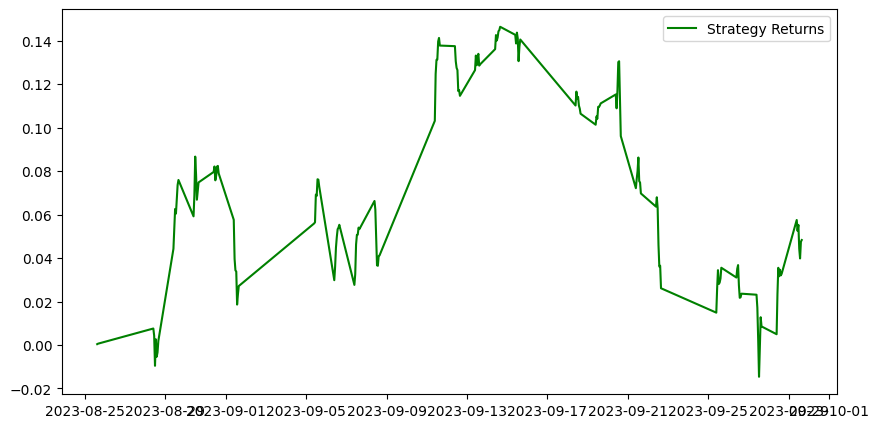

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['TM_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_TM_returns = np.cumsum(df[split:]['TM_returns'])


df['Strategy_returns'] = df['TM_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf

# Define the ticker symbol for oil (e.g., WTI Crude Oil)
ticker_symbol = "CL=F"  # CL=F represents the WTI Crude Oil futures

# Define the start and end dates
start_date = "2023-09-23"
end_date = "2023-09-29"

# Fetch the historical data
oil_prices = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the DataFrame
print(oil_prices)


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-09-25  90.550003  90.830002  89.029999  89.680000  89.680000  328369
2023-09-26  89.879997  90.739998  88.190002  90.389999  90.389999  318016
2023-09-27  90.529999  94.169998  90.400002  93.680000  93.680000  504630
2023-09-28  93.779999  95.029999  91.389999  91.709999  91.709999  406709


[*********************100%%**********************]  1 of 1 completed


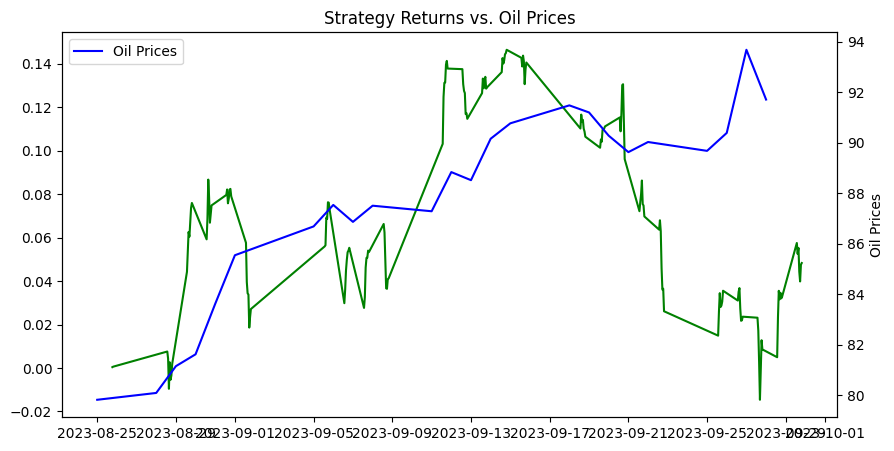

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch oil prices
ticker_symbol_oil = "CL=F"
start_date_oil = "2023-08-25"
end_date_oil = "2023-09-29"
oil_prices = yf.download(ticker_symbol_oil, start=start_date_oil, end=end_date_oil)

# Your existing code for strategy returns
# Assuming df is your DataFrame containing trading signals and TM returns

# Plotting the cumulative strategy returns
plt.figure(figsize=(10, 5))
plt.plot(Cumulative_Strategy_returns, color='g', label='Strategy Returns')

# Plotting oil prices
plt.twinx()  # Create a secondary y-axis to plot oil prices on the same plot
plt.plot(oil_prices['Close'], color='b', label='Oil Prices')

# Add labels and legend
plt.ylabel('Oil Prices')
plt.legend(loc='upper left')
plt.title('Strategy Returns vs. Oil Prices')
plt.show()
